In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
import os

In [2]:
# Define the function
def func_distance(x, A, lambda1, lambda2):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    term1 = A * np.exp(-x/lambda1)
    term2 = (1 - A) * np.exp(-x/lambda2)
    return term1 + term2


# Parameters sampled from normal distributions
A = norm.rvs(loc=42.8, scale=1.8)
lambda1 = norm.rvs(loc=3.78, scale=0.25)
lambda2 = norm.rvs(loc=0.035, scale=0.001)


def func_signal(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    t = np.maximum(t, 0)  # Ensures that there are no negative time offsets
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)

def generate_offsets(n, rate=1):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=1/rate, size=n)




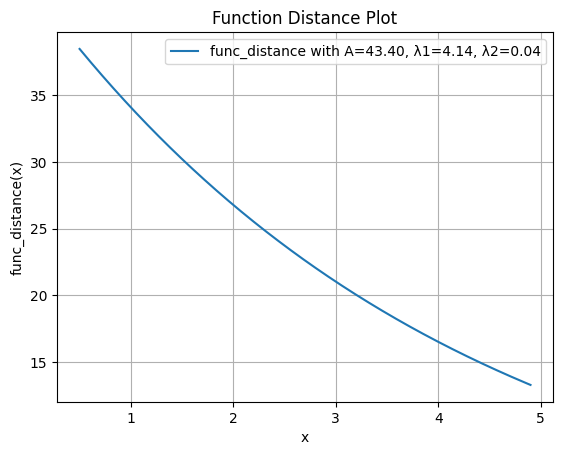

In [3]:
# Generate x values
x = np.linspace(0.5, 4.9, 400)  # Start from 0.1 to avoid division by zero

# Compute y values
y = func_distance(x, A, lambda1, lambda2)

# Create the plot
plt.plot(x, y, label=f'func_distance with A={A:.2f}, λ1={lambda1:.2f}, λ2={lambda2:.2f}')

# Add title and labels
plt.title('Function Distance Plot')
plt.xlabel('x')
plt.ylabel('func_distance(x)')


# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


Sampled parameters: A=43.39632904778293, lambda1=4.141059491589948, lambda2=0.03647254609913005


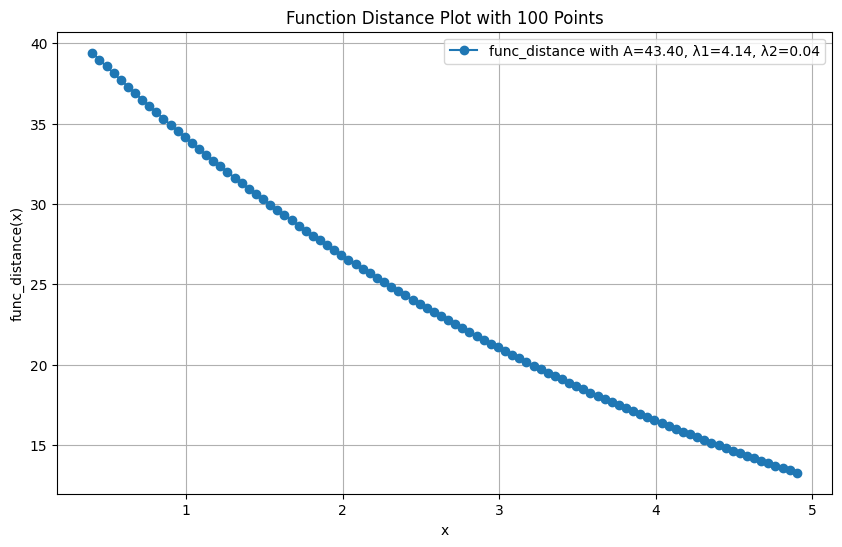

In [4]:
# Print the sampled parameters for reference
print(f"Sampled parameters: A={A}, lambda1={lambda1}, lambda2={lambda2}")

# Generate 100 x values within the range from 0.4 to 4.9
x_values = np.linspace(0.4, 4.9, 100)

# Compute the corresponding y values using the sampled parameters
y_values = func_distance(x_values, A, lambda1, lambda2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o-', label=f'func_distance with A={A:.2f}, λ1={lambda1:.2f}, λ2={lambda2:.2f}')

# Add title and labels
plt.title('Function Distance Plot with 100 Points')
plt.xlabel('x')
plt.ylabel('func_distance(x)')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


Sampled parameters: A=43.39632904778293, lambda1=4.141059491589948, lambda2=0.03647254609913005


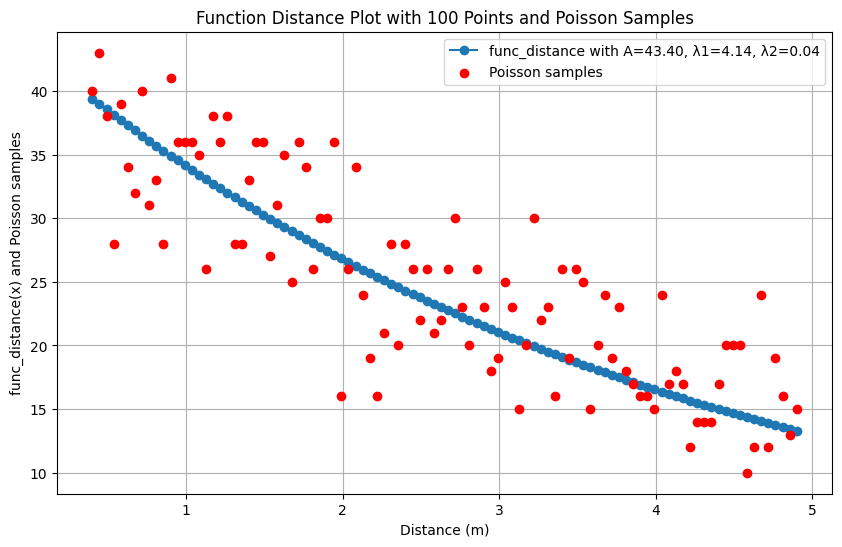

[40 43 38 28 39 34 32 40 31 33 28 41 36 36 36 35 26 38 36 38 28 28 33 36
 36 27 31 35 25 36 34 26 30 30 36 16 26 34 24 19 16 21 28 20 28 26 22 26
 21 22 26 30 23 20 26 23 18 19 25 23 15 20 30 22 23 16 26 19 26 25 15 20
 24 19 23 18 17 16 16 15 24 17 18 17 12 14 14 14 17 20 20 20 10 12 24 12
 19 16 13 15]


In [5]:
# Print the sampled parameters for reference
print(f"Sampled parameters: A={A}, lambda1={lambda1}, lambda2={lambda2}")

# Generate 100 x values within the range from 0.4 to 4.9
x_values = np.linspace(0.4, 4.9, 100)
y_values = func_distance(x_values, A, lambda1, lambda2)

# Use the y-values as parameters for a Poisson distribution and sample new points
poisson_samples = poisson.rvs(mu=np.abs(y_values))

# Save the new points to a file (optional)
np.savetxt("poisson_samples.txt", poisson_samples) # Very optional -> I dont think I need it

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o-', label=f'func_distance with A={A:.2f}, λ1={lambda1:.2f}, λ2={lambda2:.2f}')
plt.scatter(x_values, poisson_samples, color='red', label='Poisson samples', zorder=5)

# Add title and labels
plt.title('Function Distance Plot with 100 Points and Poisson Samples')
plt.xlabel('Distance (m)')
plt.ylabel('func_distance(x) and Poisson samples')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Print the sampled Poisson values
print(poisson_samples)


Agregar el ploteo agrega casi 1 minuto a la simulación (corre en ~7sg contra ~70sg) -> asi que salvo que quiera mostrar los plots, es innecesaria.

In [6]:
def export_data_real_muon(t_values, summed_values, n_photons, index):
    # Create the directory if it doesn't exist
    folder_name = "real_muons"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    # Define the file path with an index to ensure uniqueness
    filename = os.path.join(folder_name, f"photon_data_{n_photons}_photons_real_muon_{index}.txt")
    
    # Write the data to the file
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.


def simulate_photon_data_real_muon(n_photons, index):
    lambda_rate = 0.1 # LAMBDA RATE = 0.1
    random_offsets = generate_offsets(n_photons, rate=lambda_rate)
    t_values = np.linspace(0, 150, 3000)
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    #plt.figure(figsize=(10, 6))

    for offset in random_offsets:
        individual_values = func_signal(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        plt.plot(t_values*(10**(-9)), individual_values, color='gray', alpha=0.3)  # Plot each individual photon signal
        summed_values += individual_values

    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    # Plot the resulting summed function
    plt.plot(t_values, summed_values, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_real_muon(t_values, summed_values, n_photons, index)

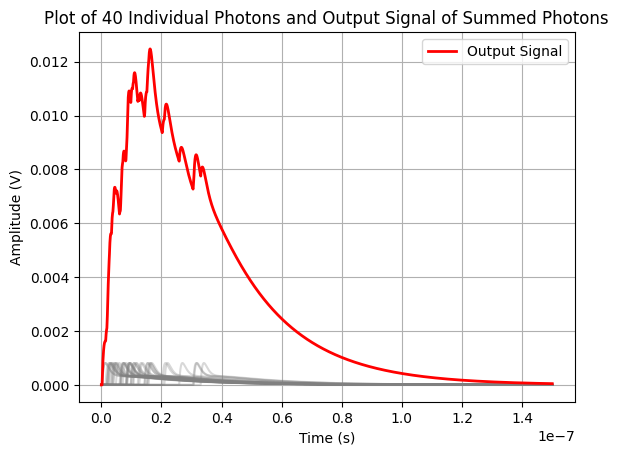

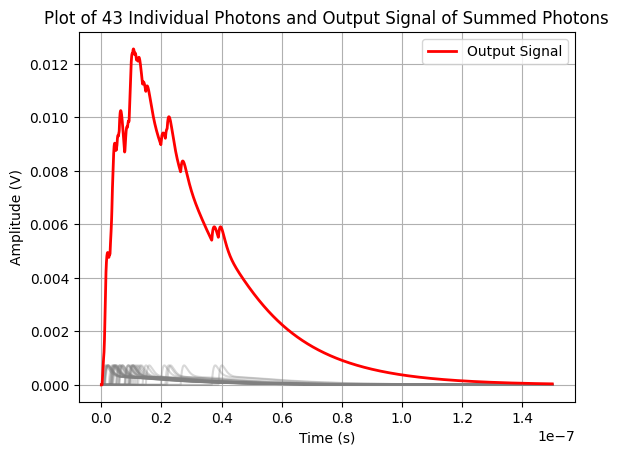

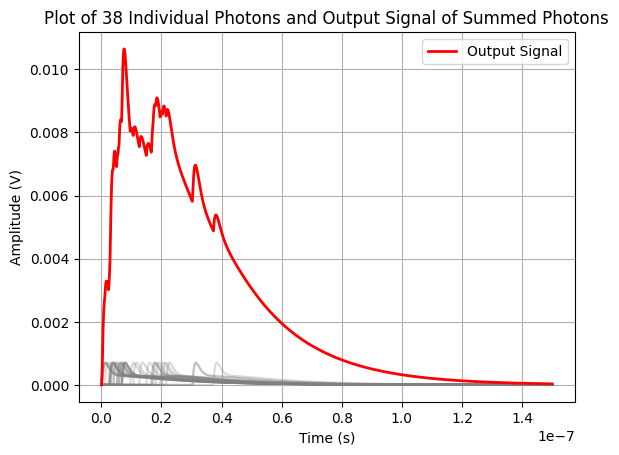

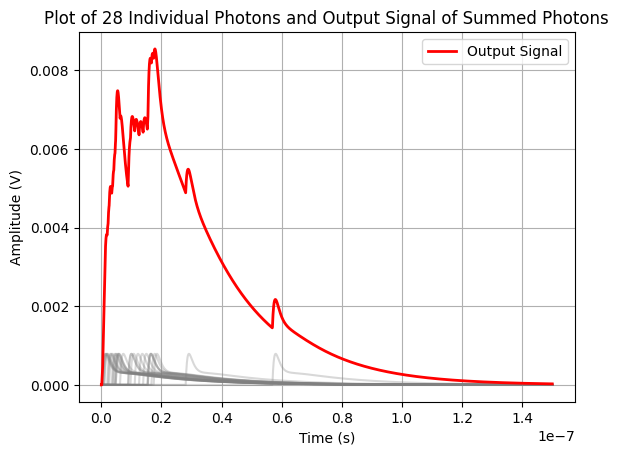

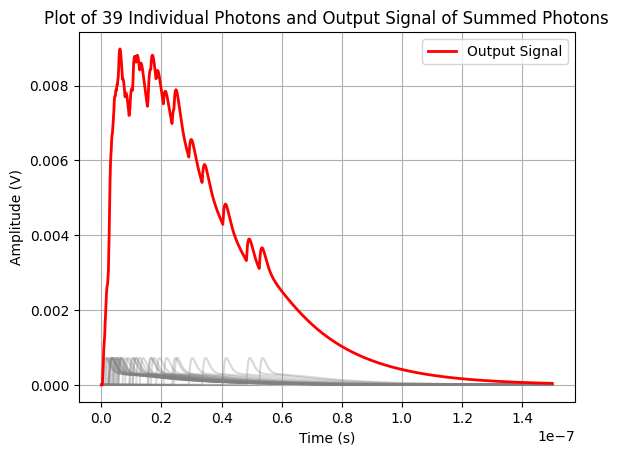

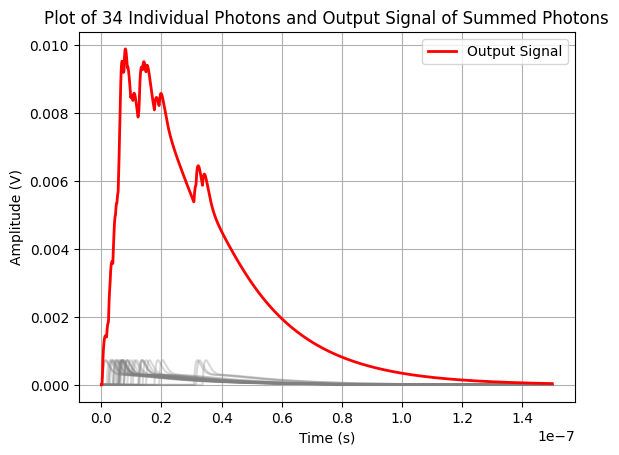

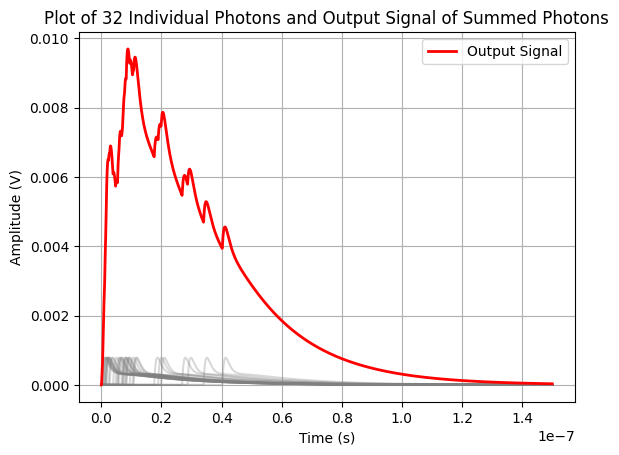

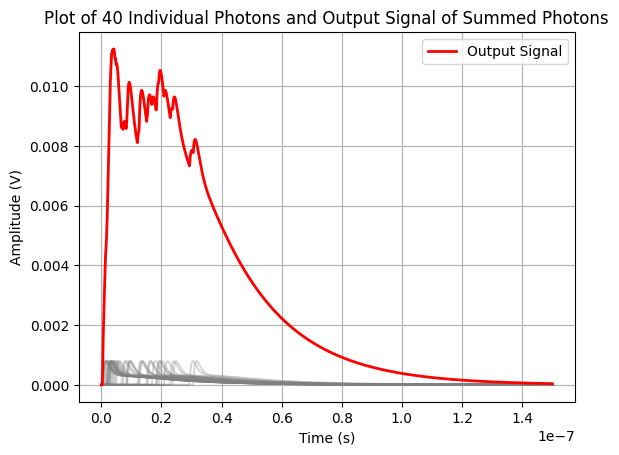

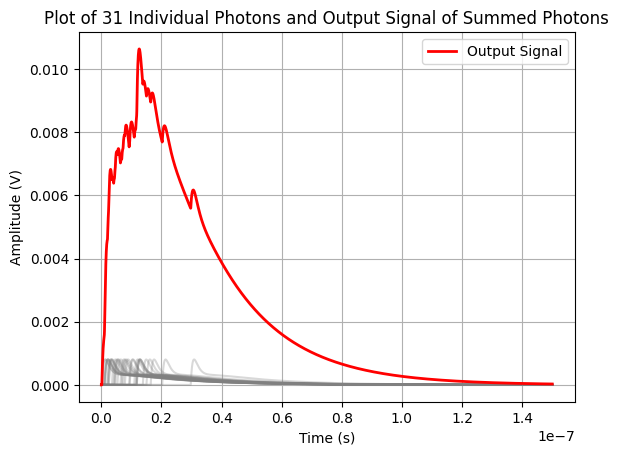

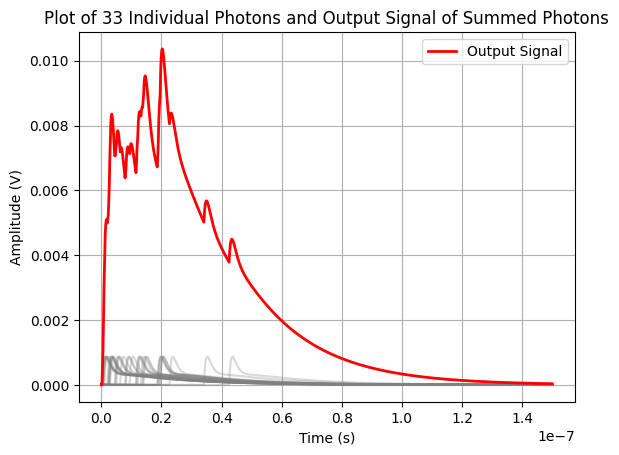

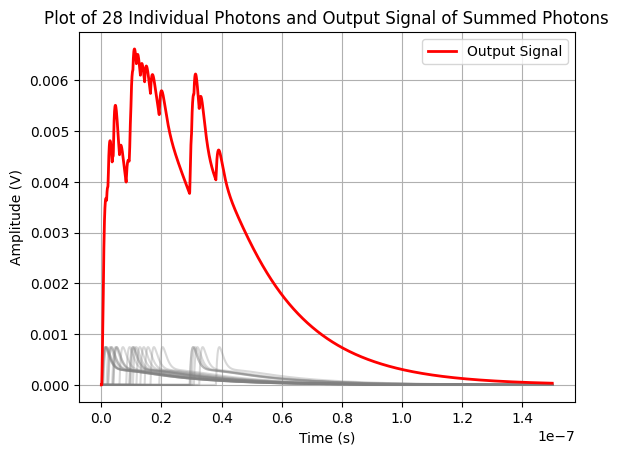

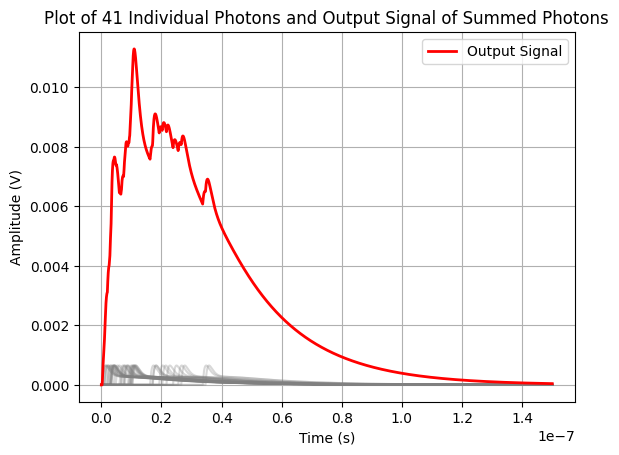

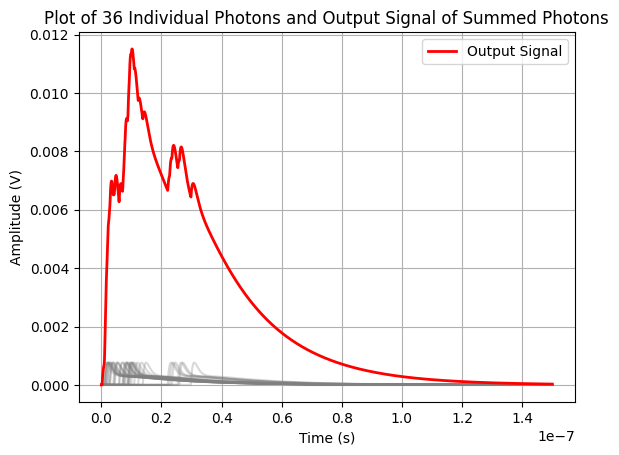

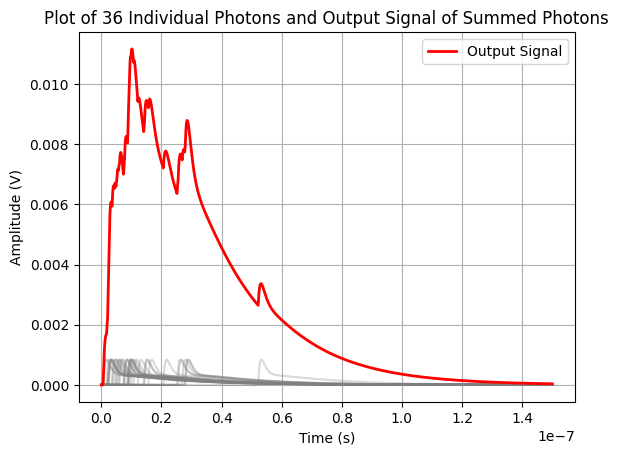

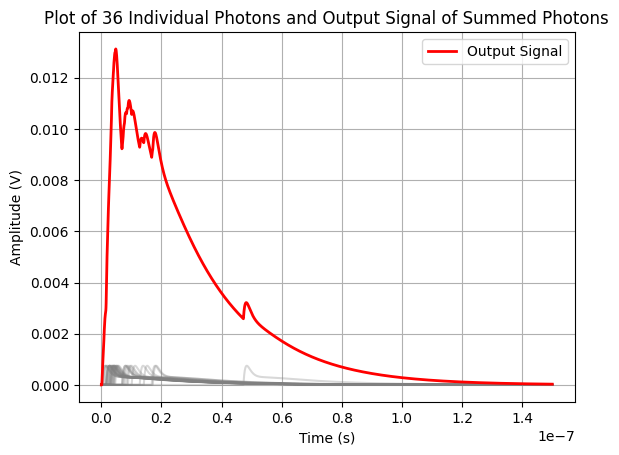

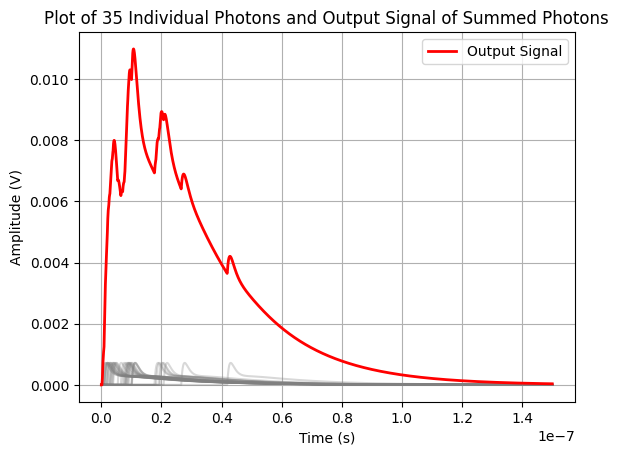

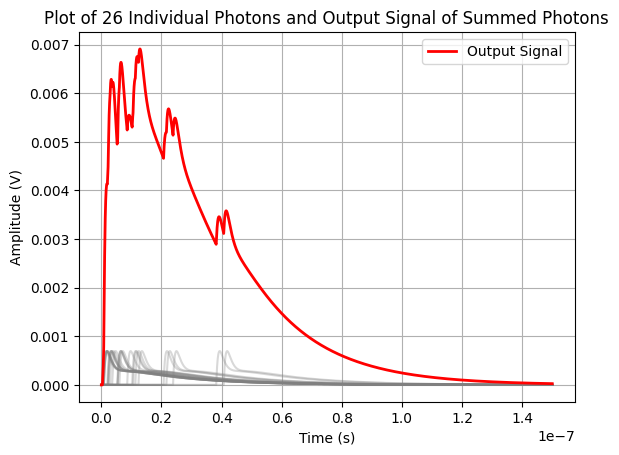

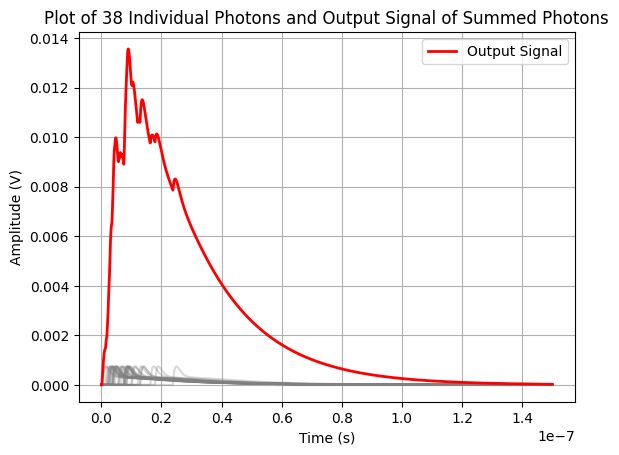

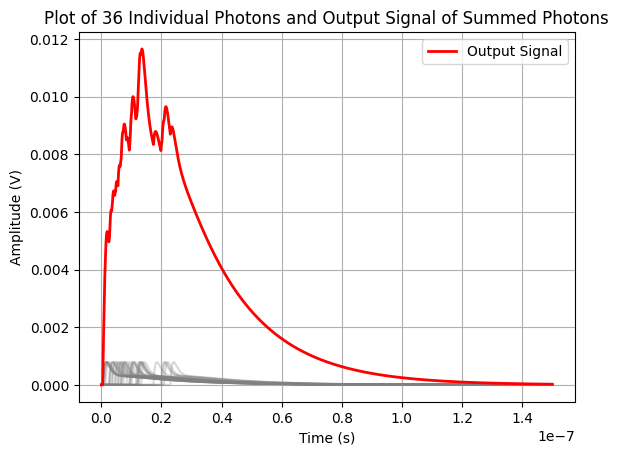

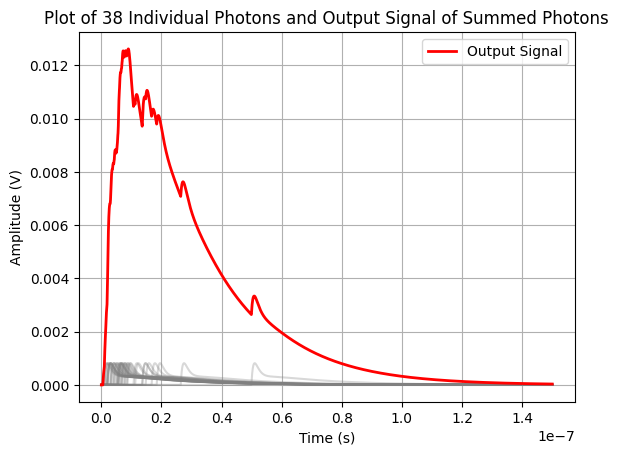

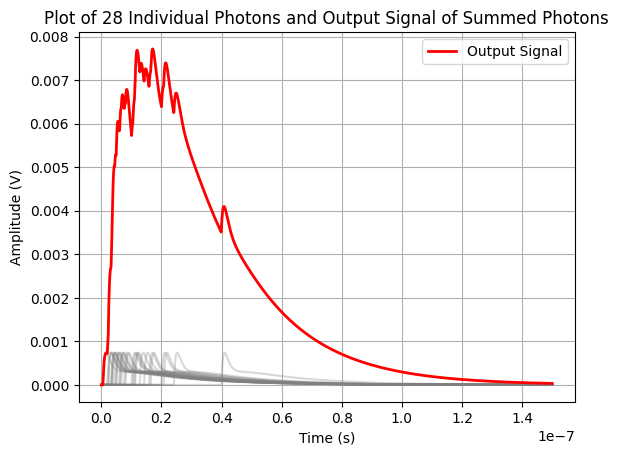

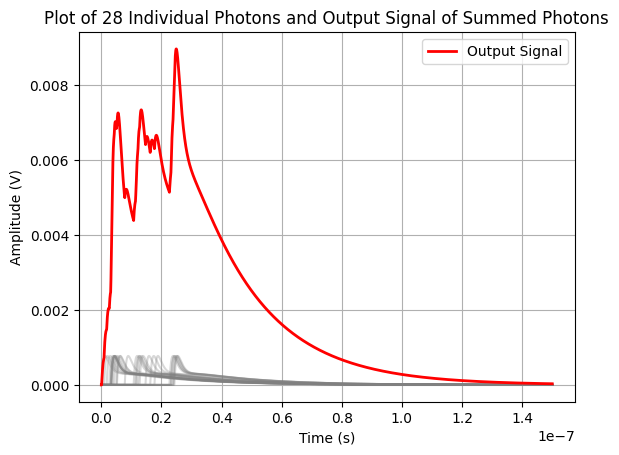

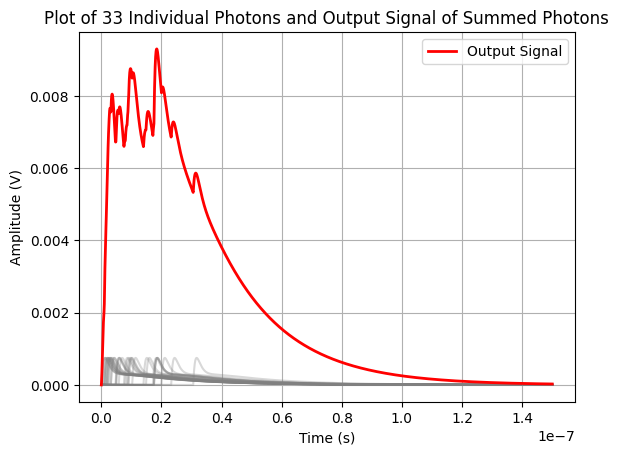

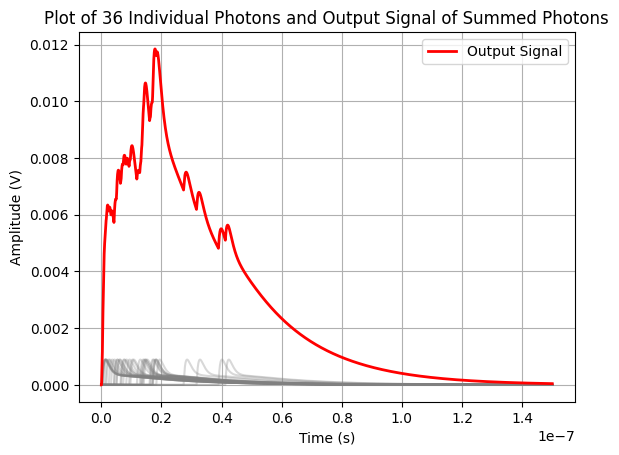

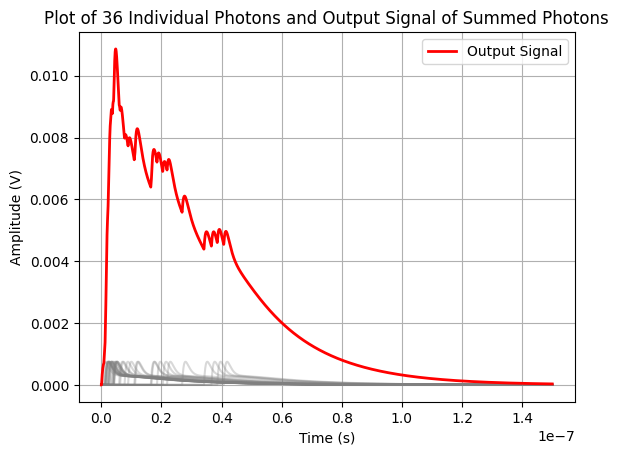

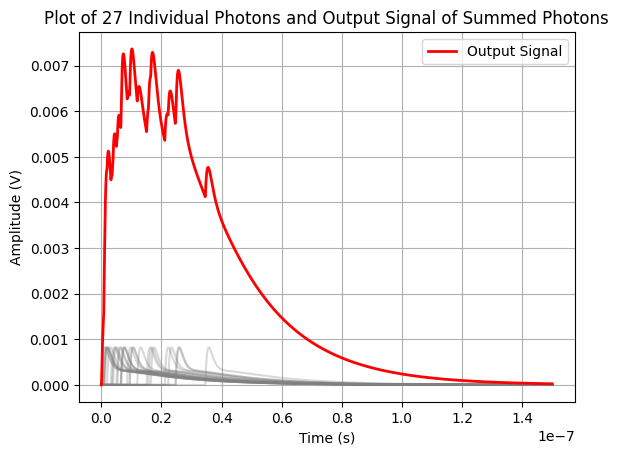

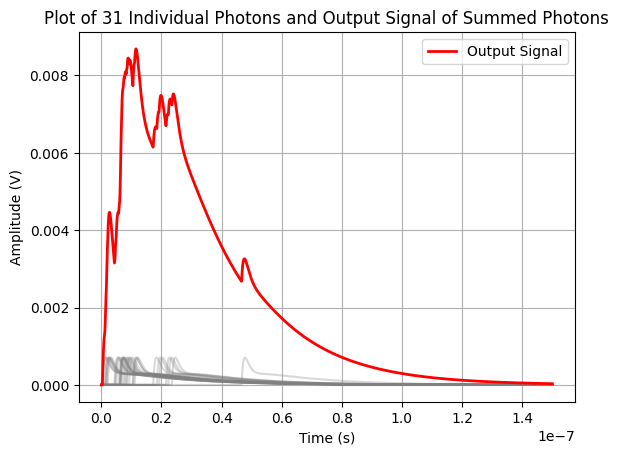

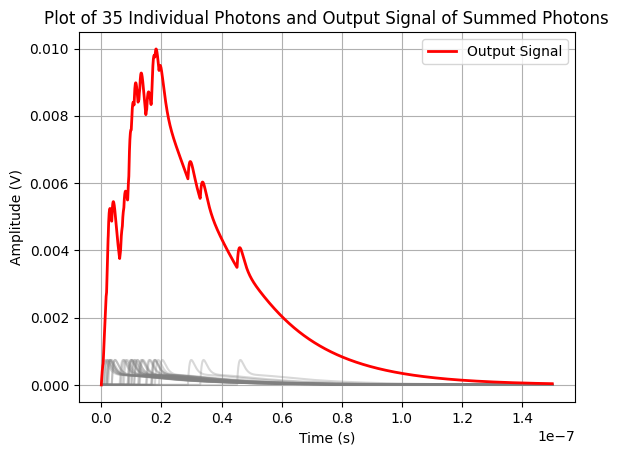

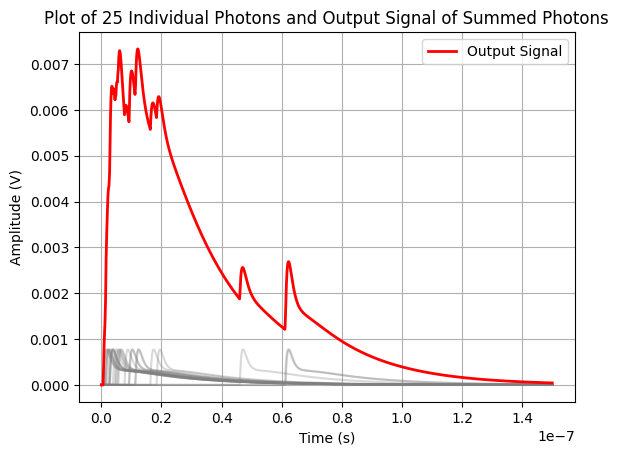

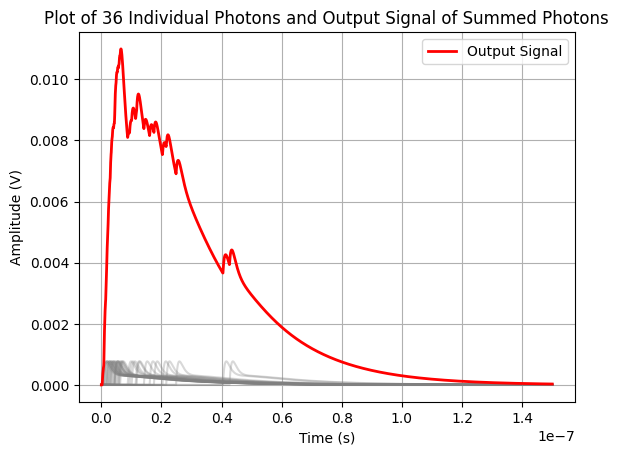

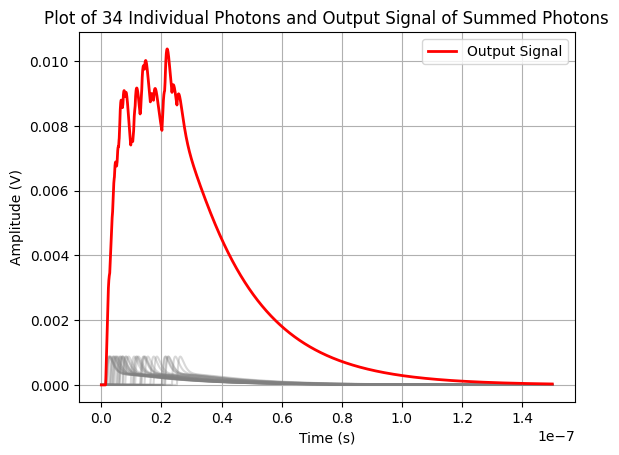

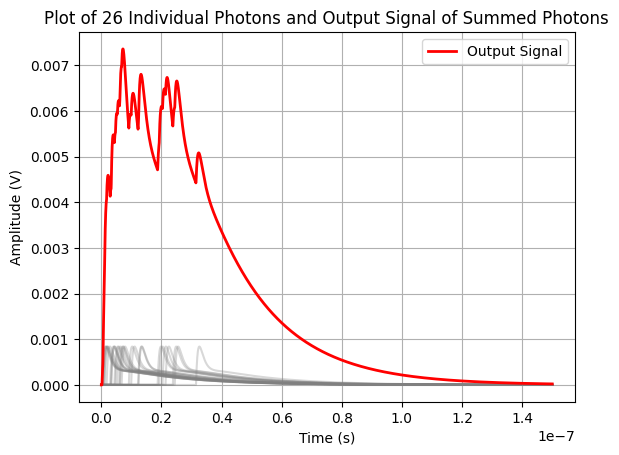

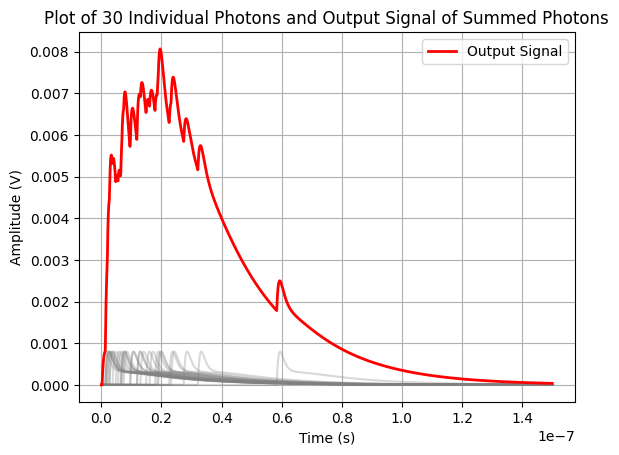

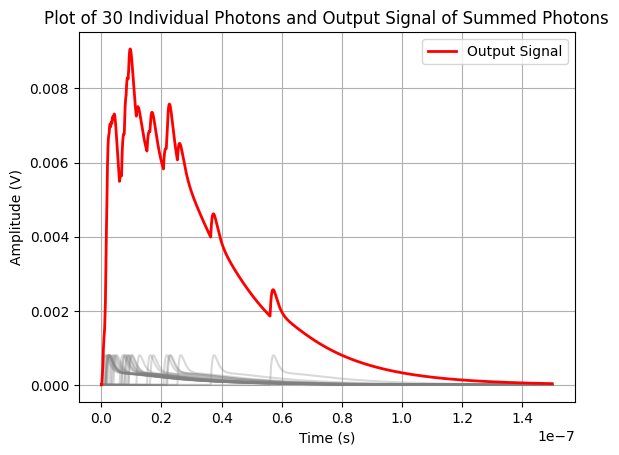

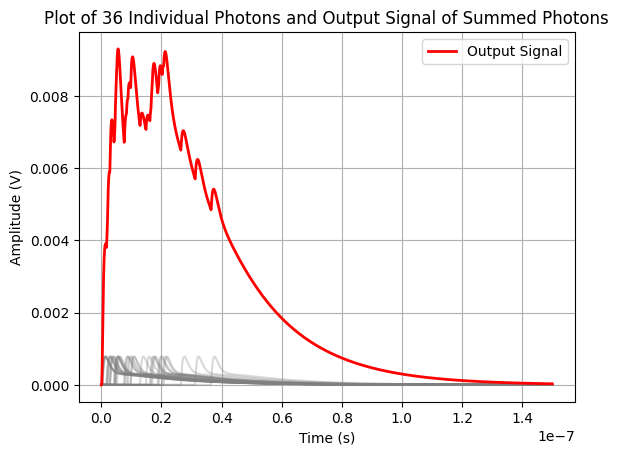

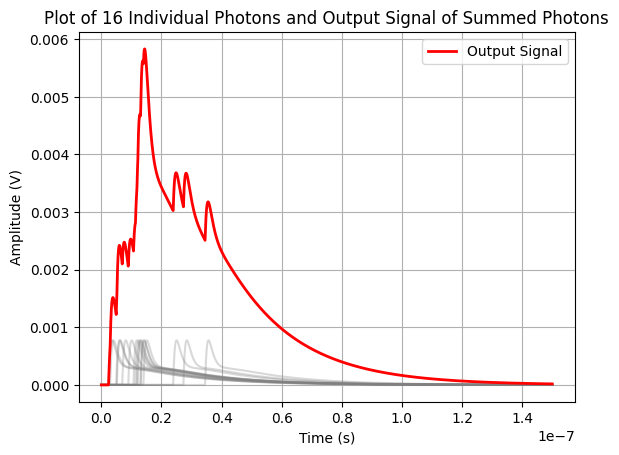

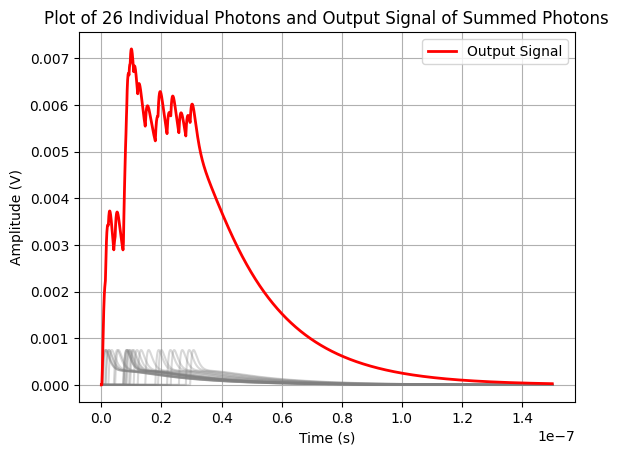

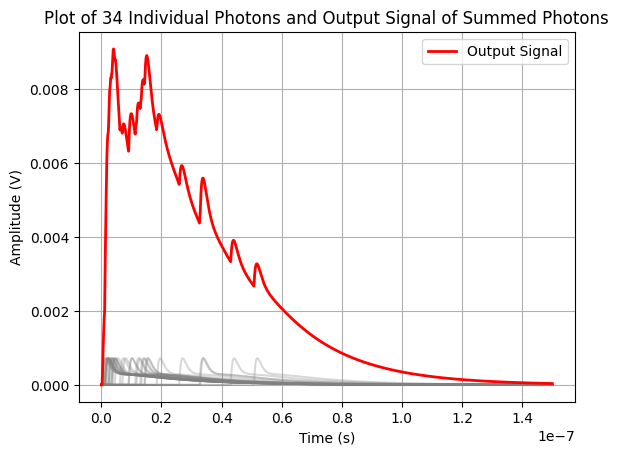

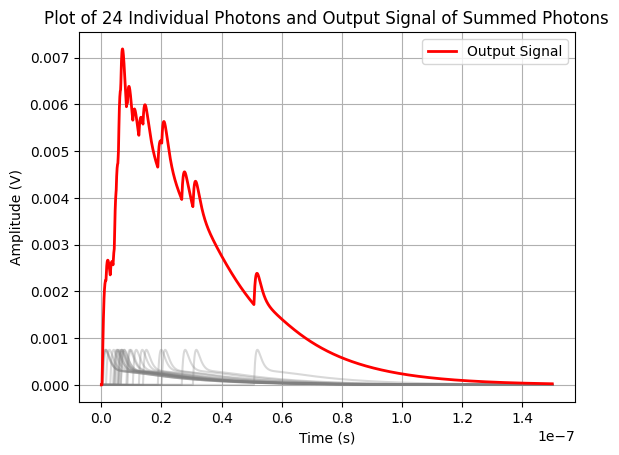

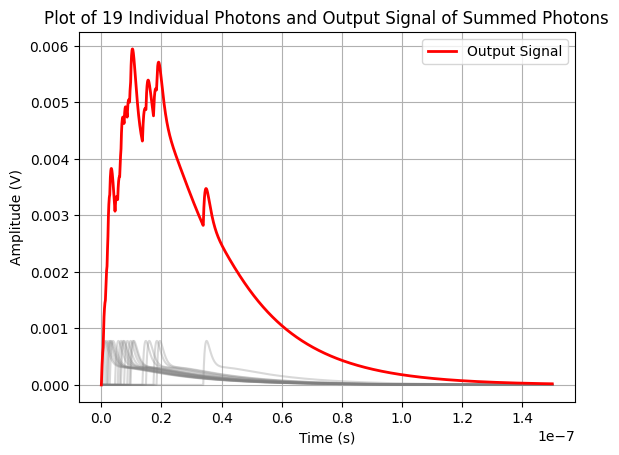

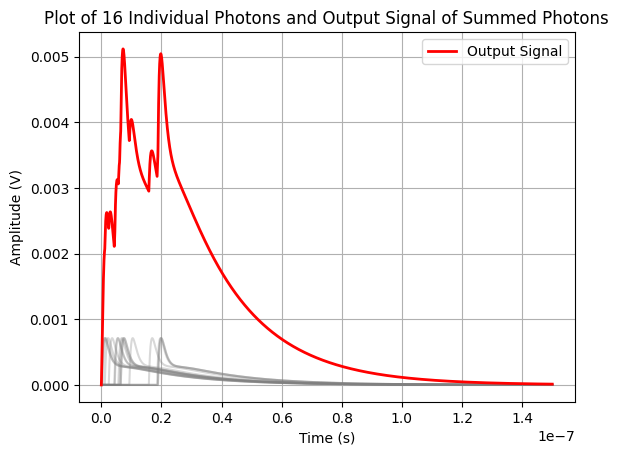

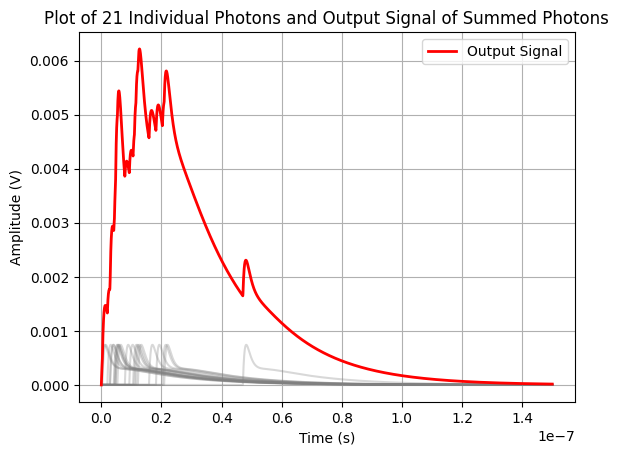

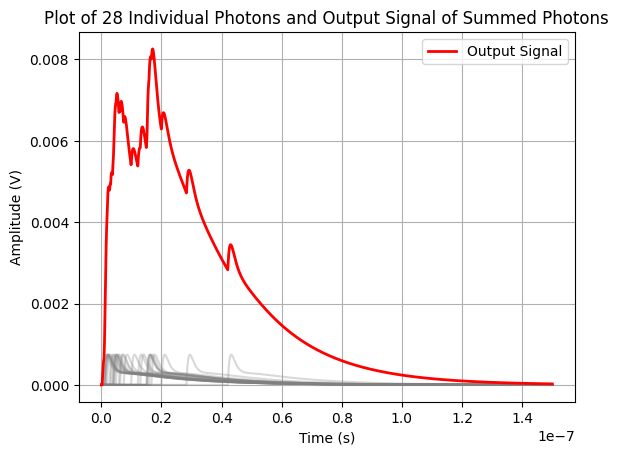

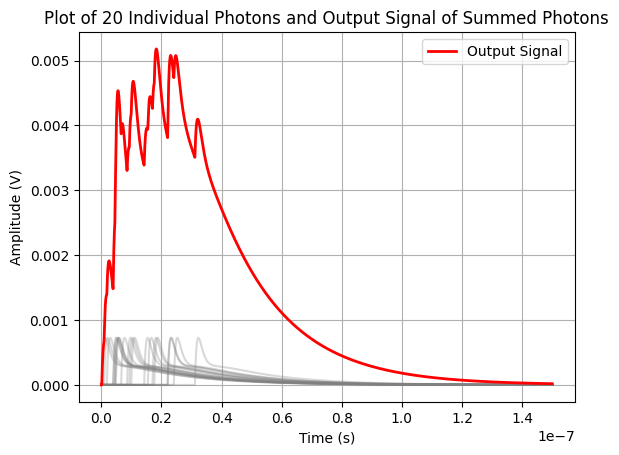

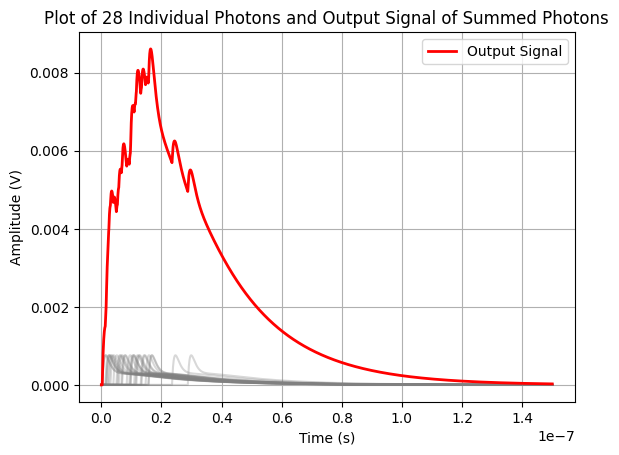

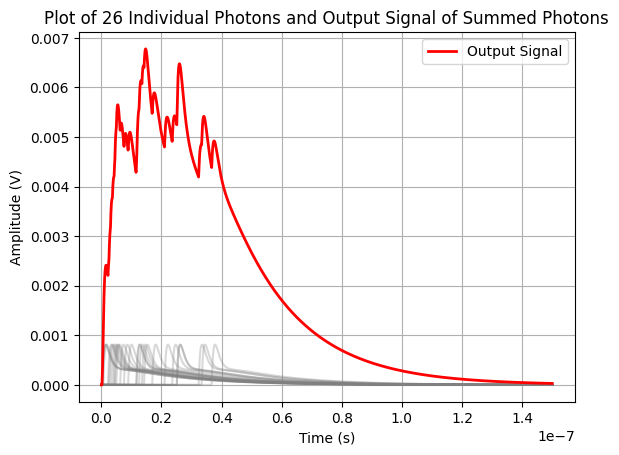

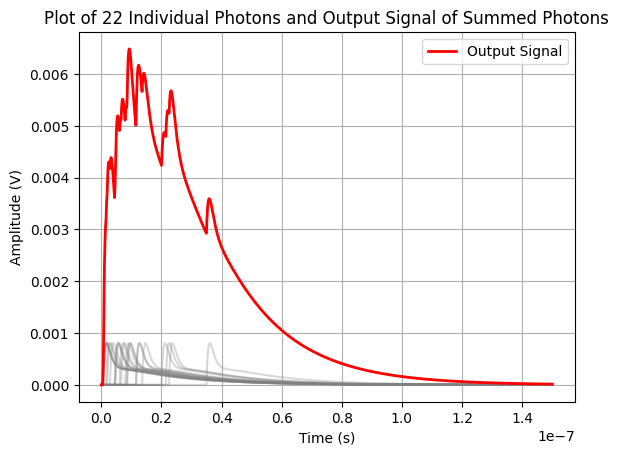

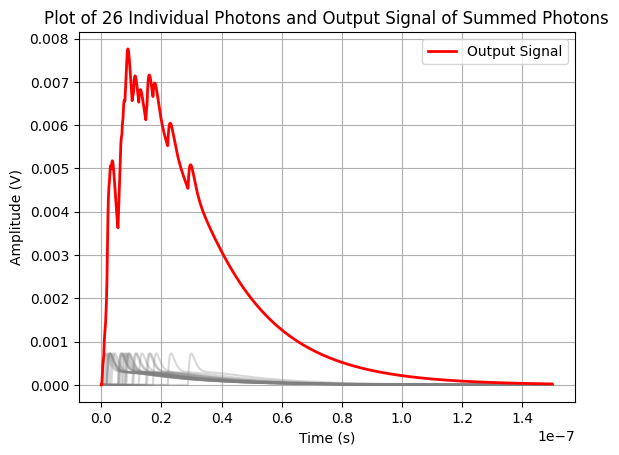

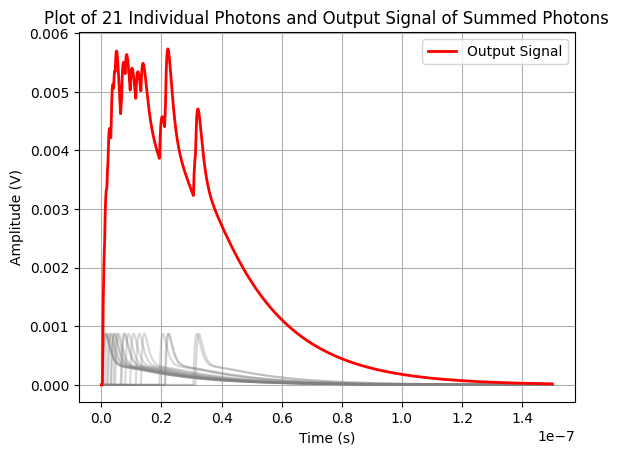

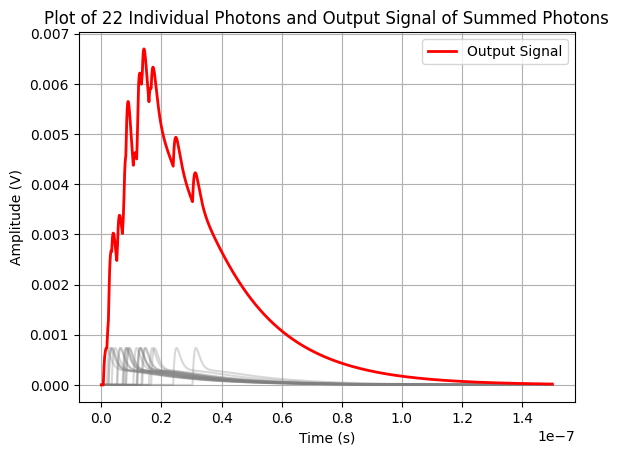

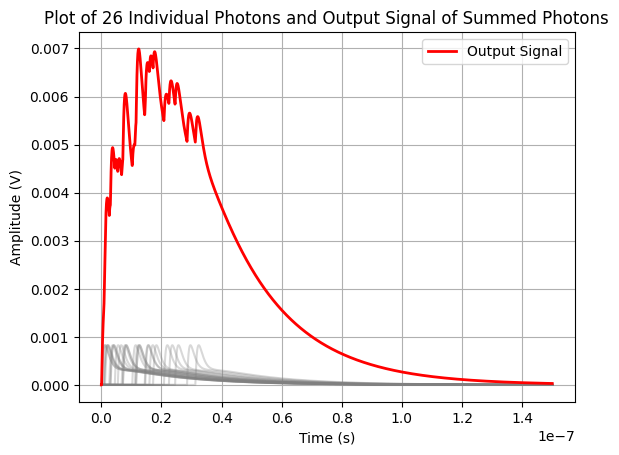

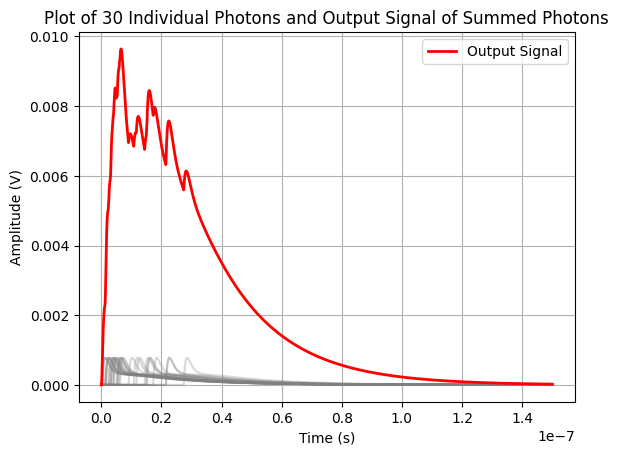

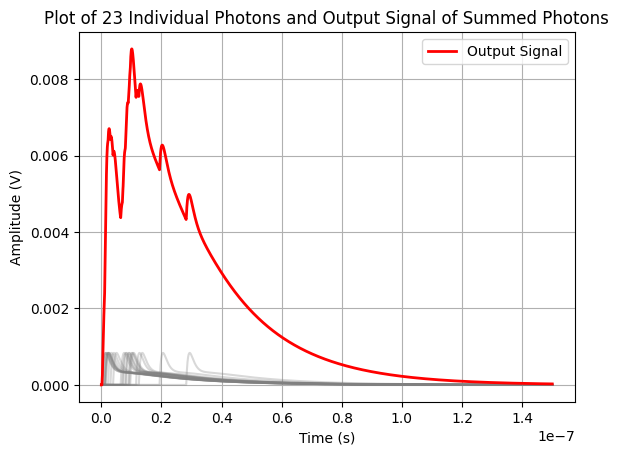

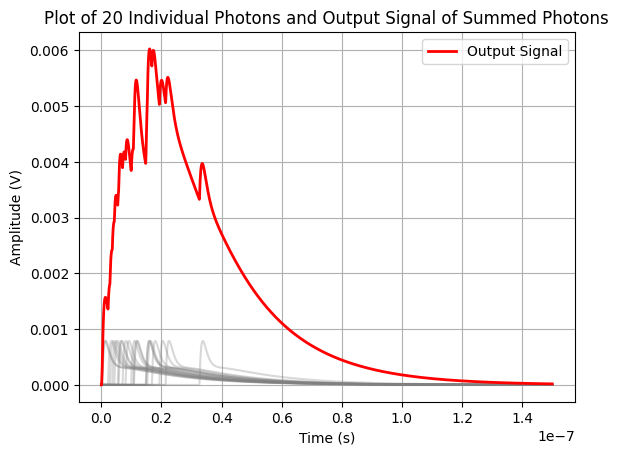

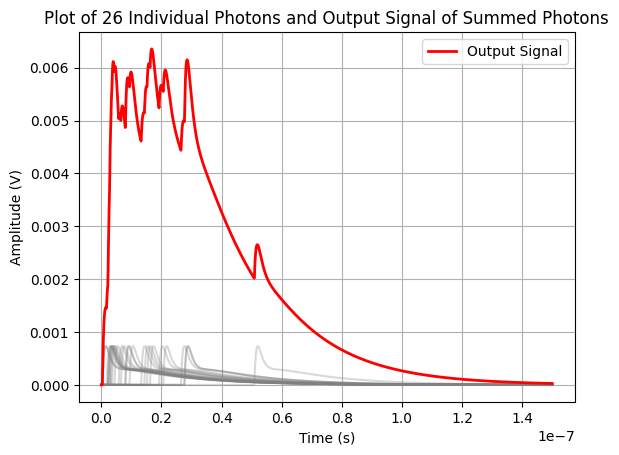

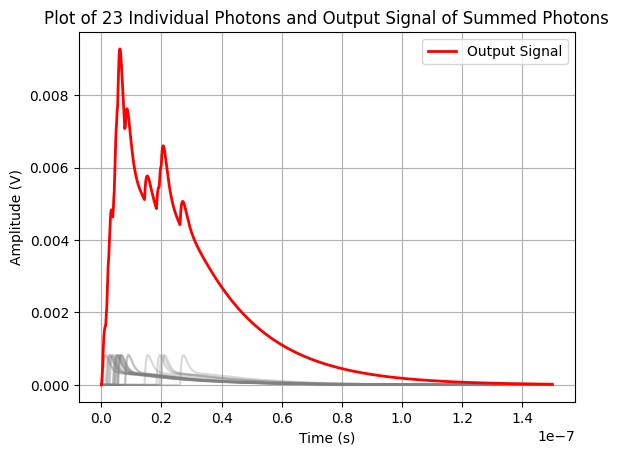

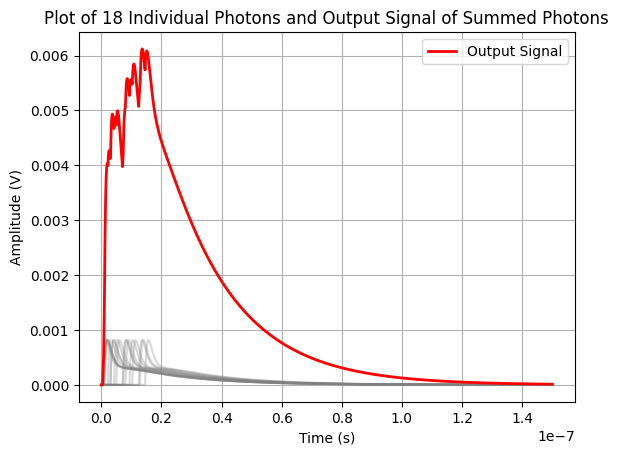

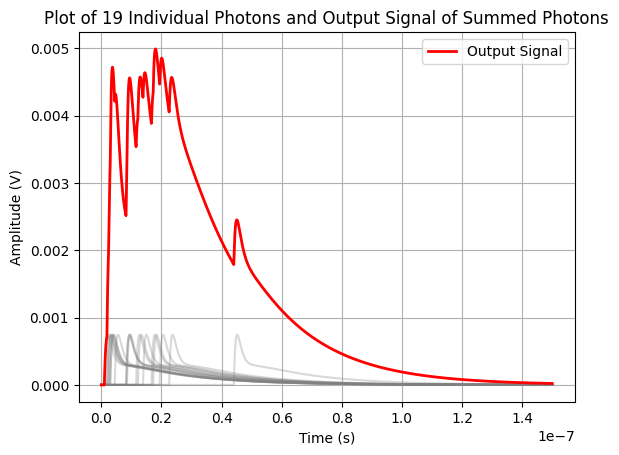

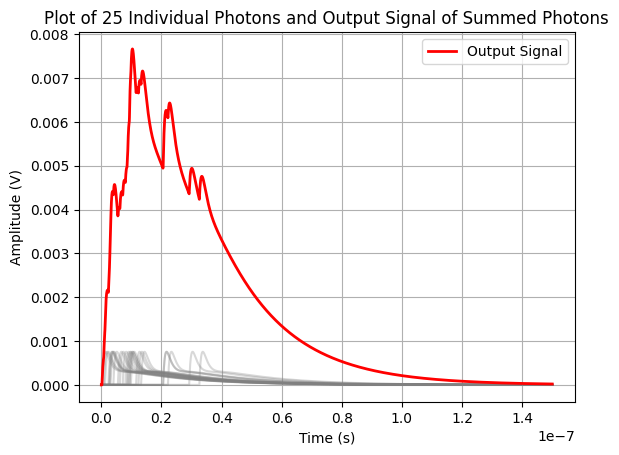

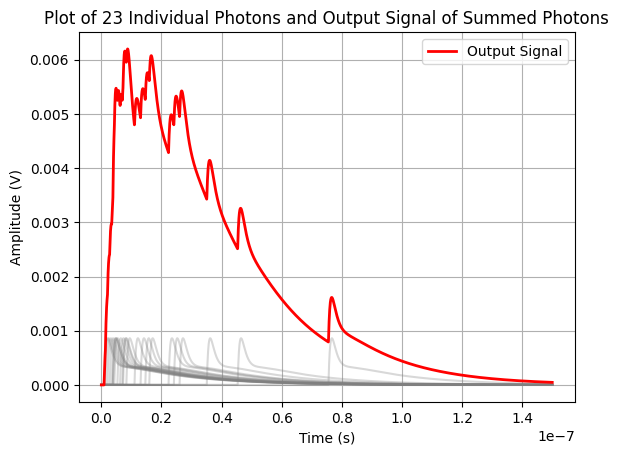

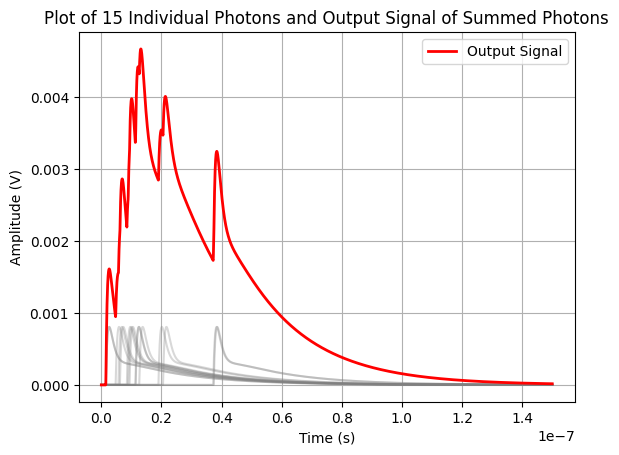

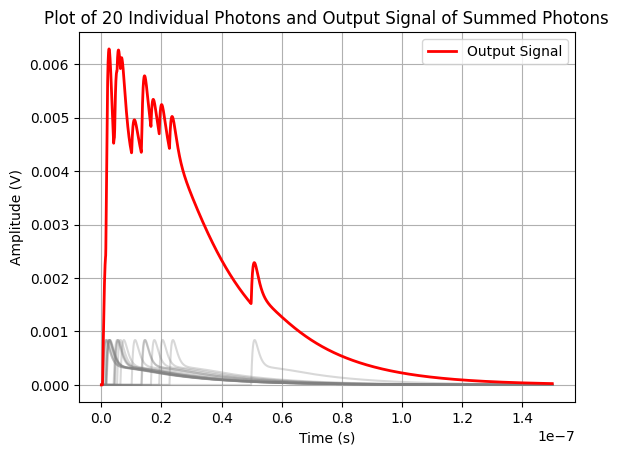

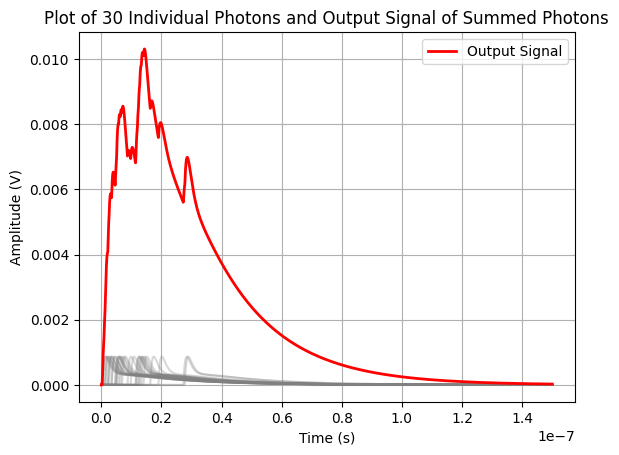

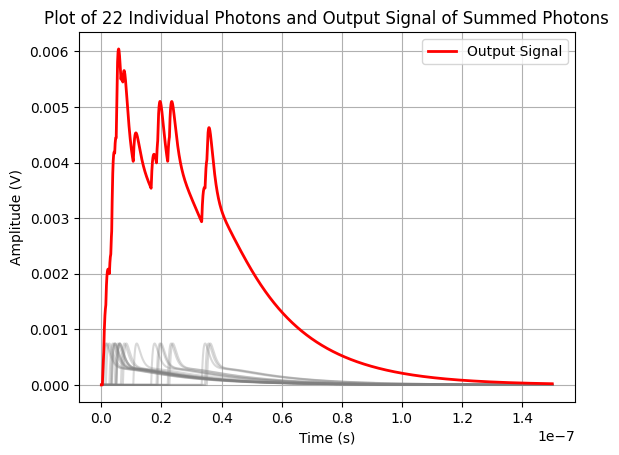

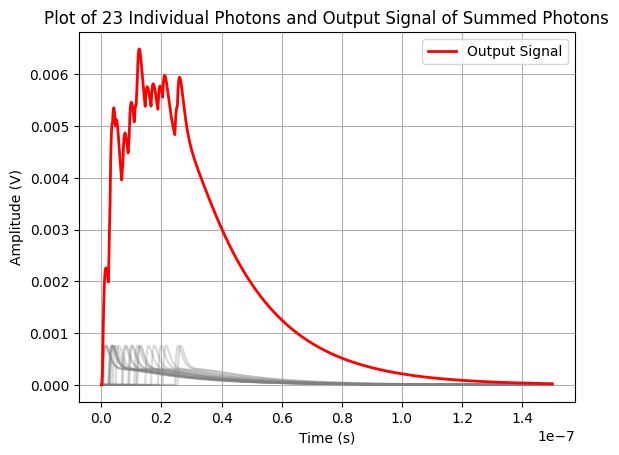

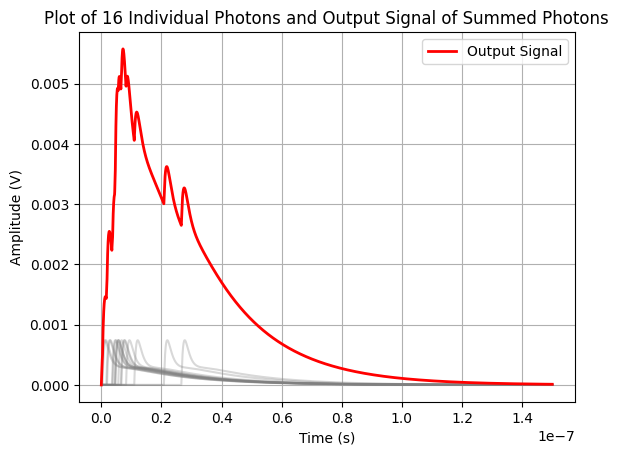

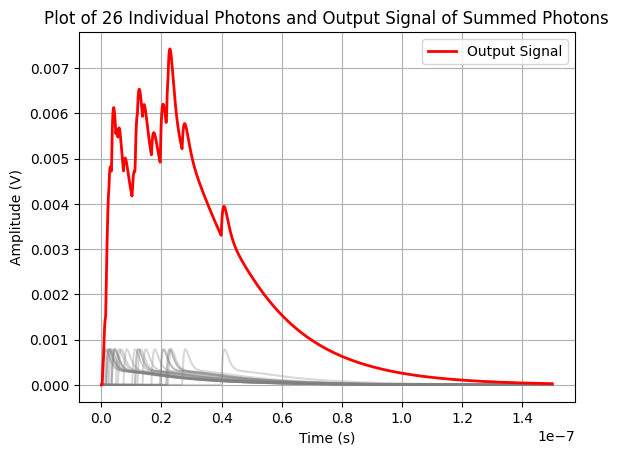

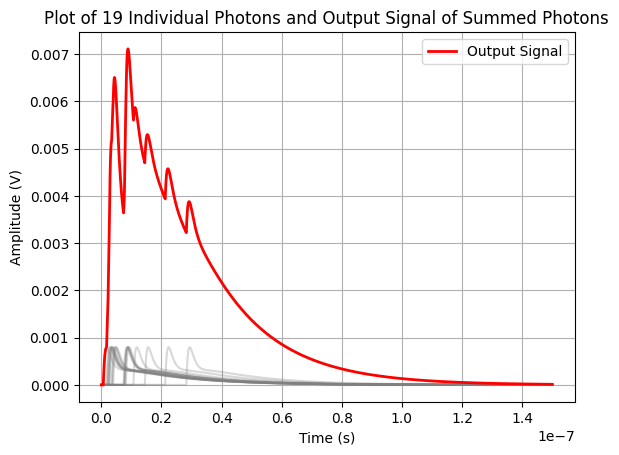

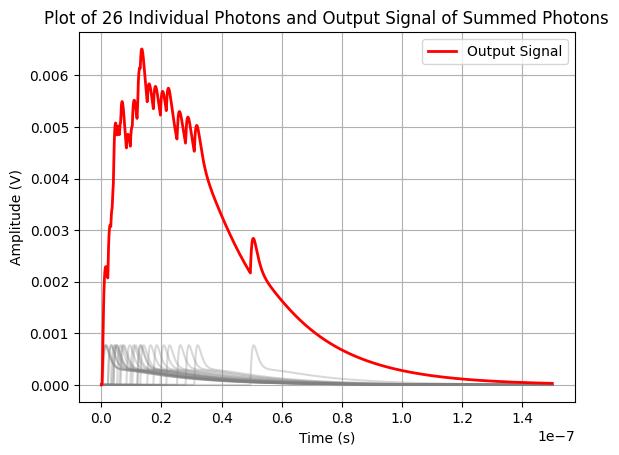

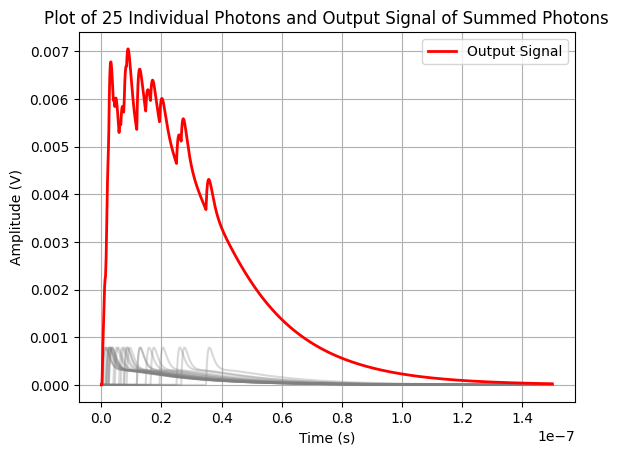

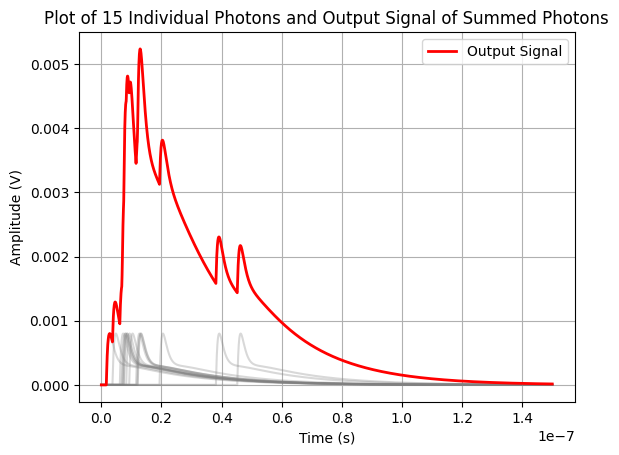

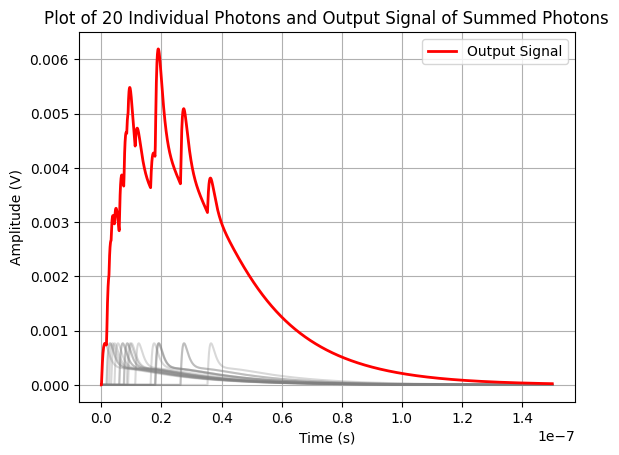

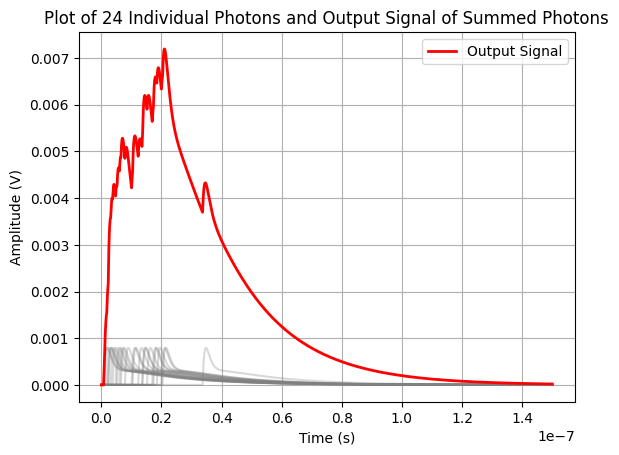

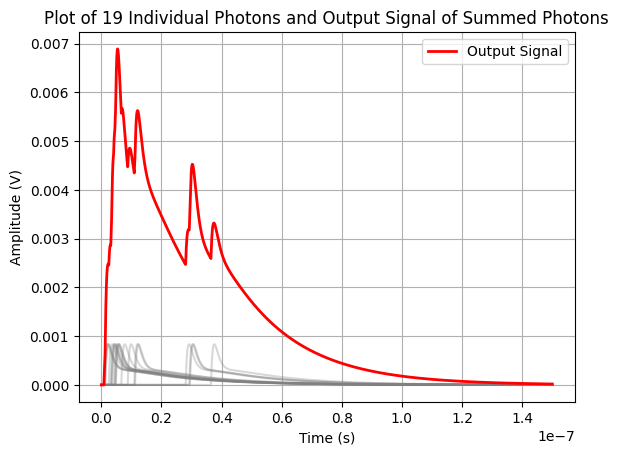

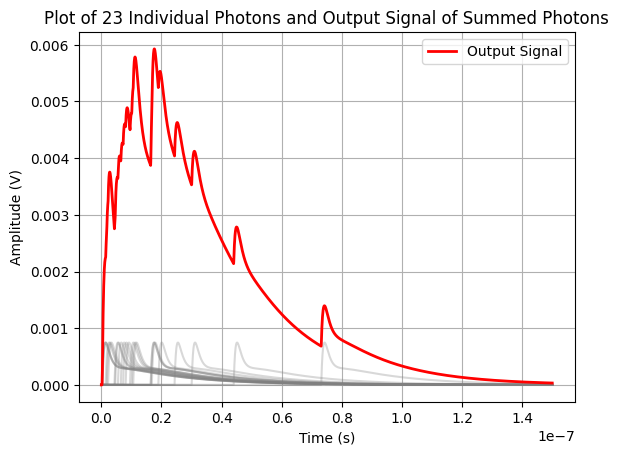

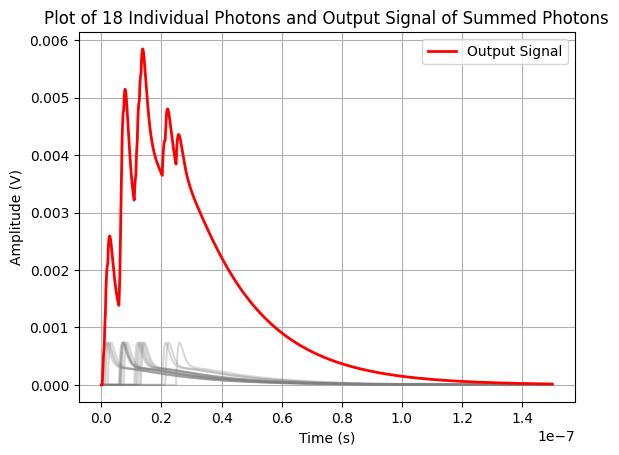

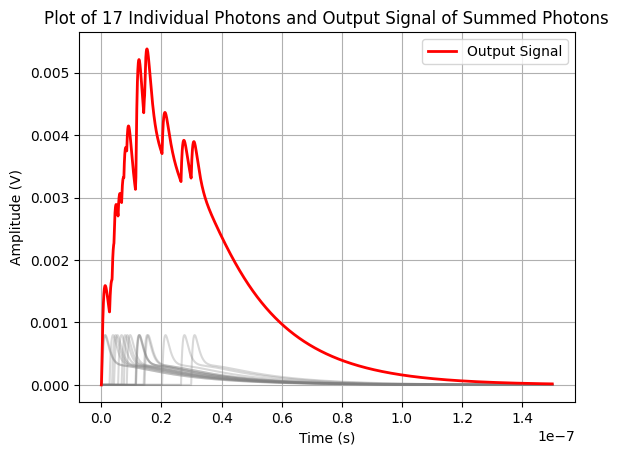

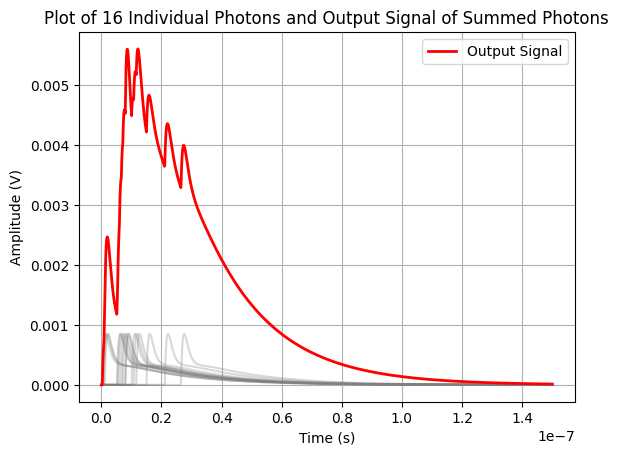

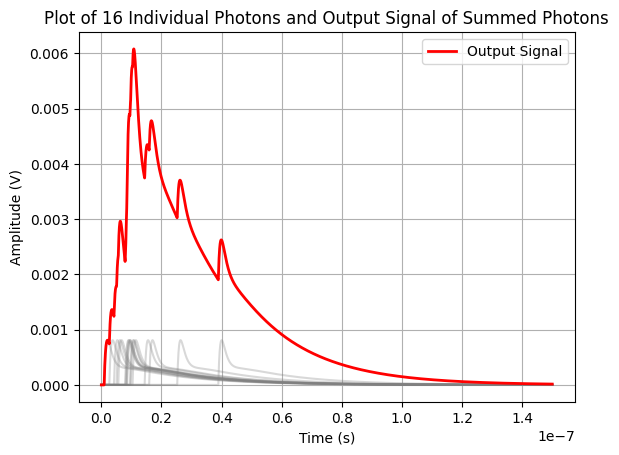

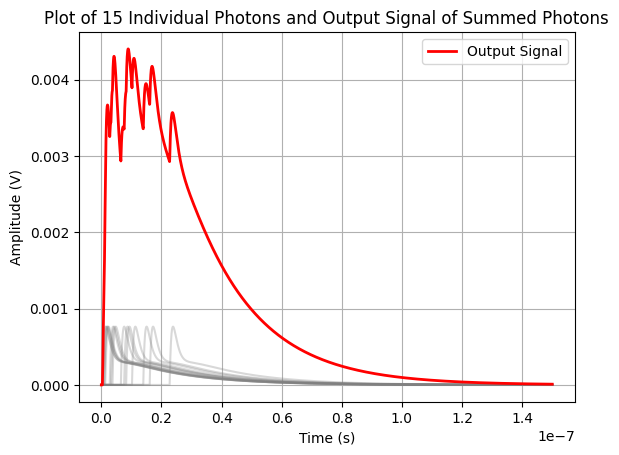

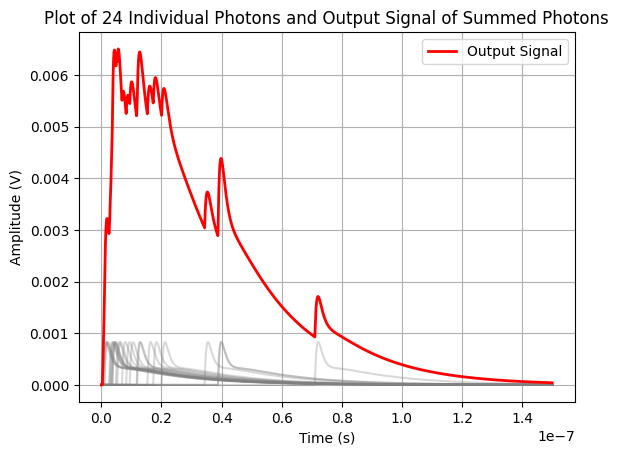

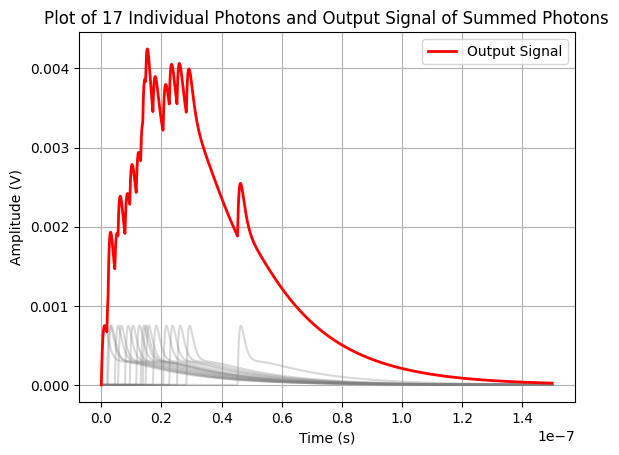

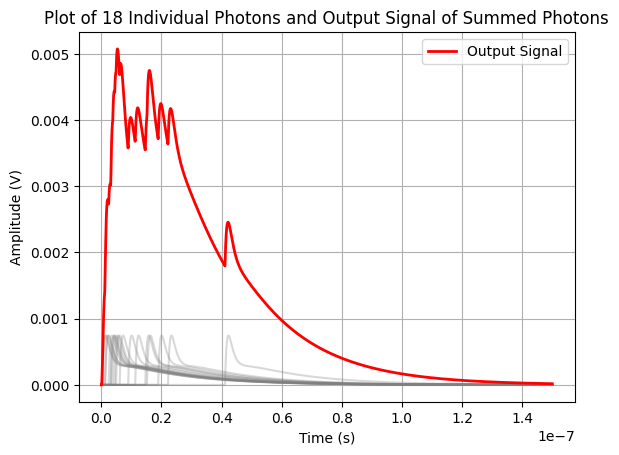

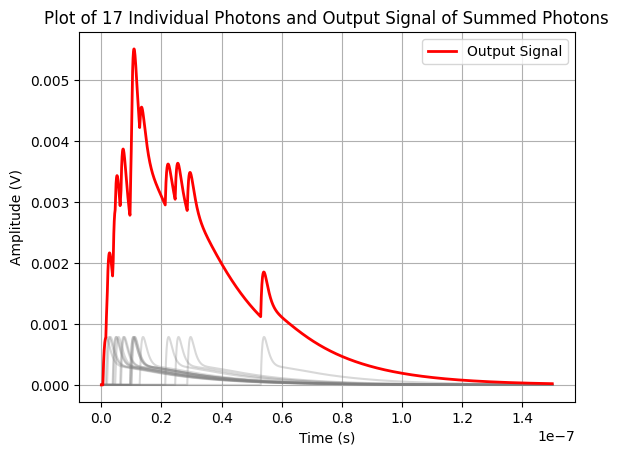

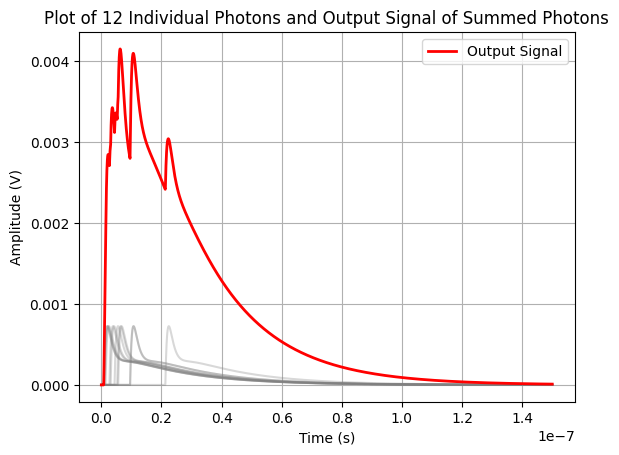

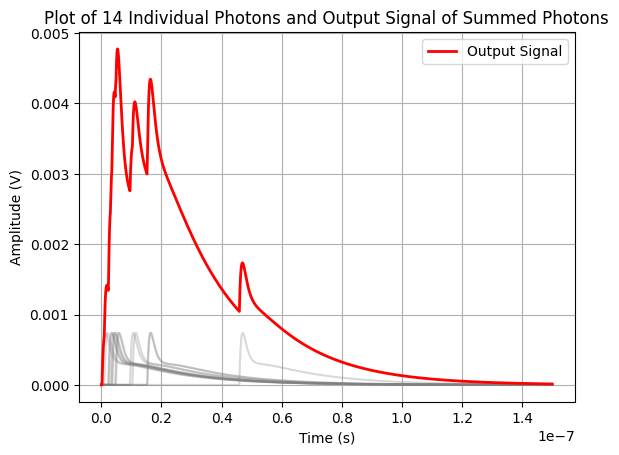

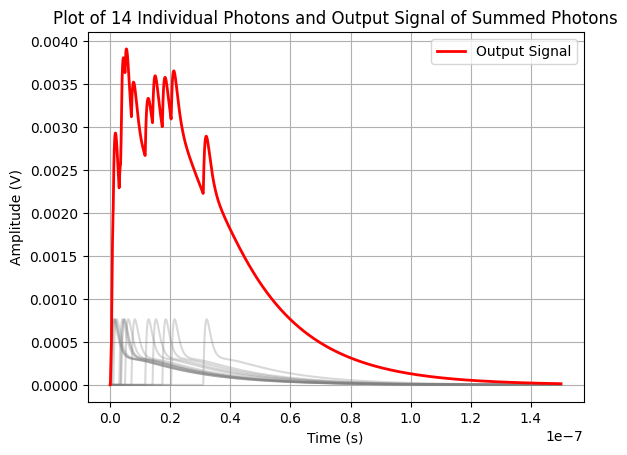

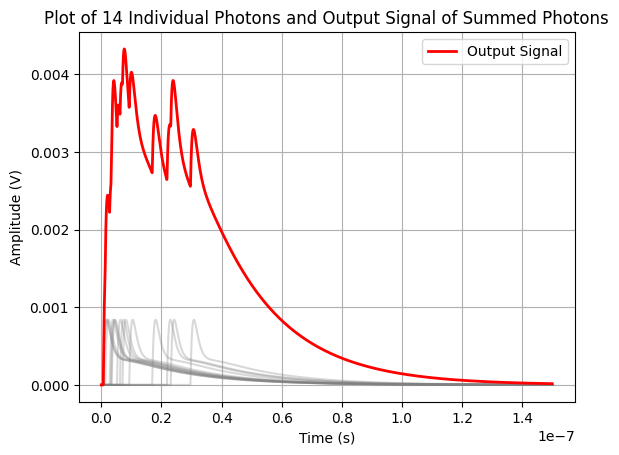

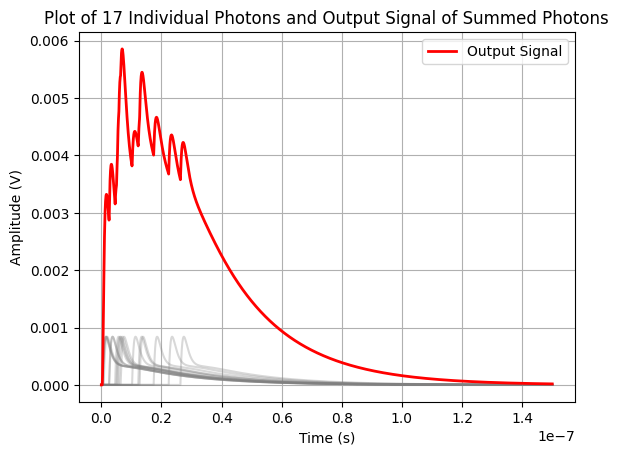

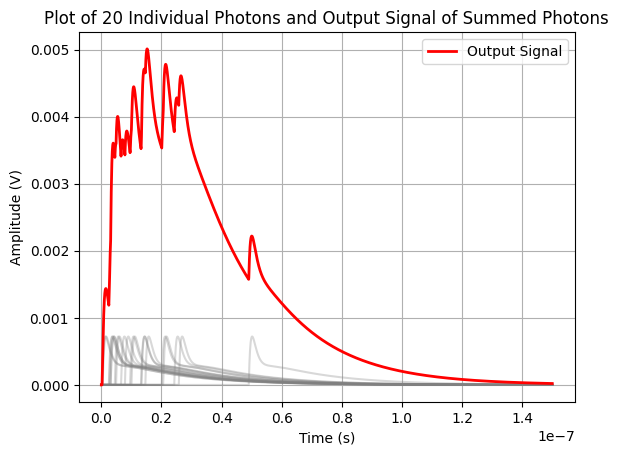

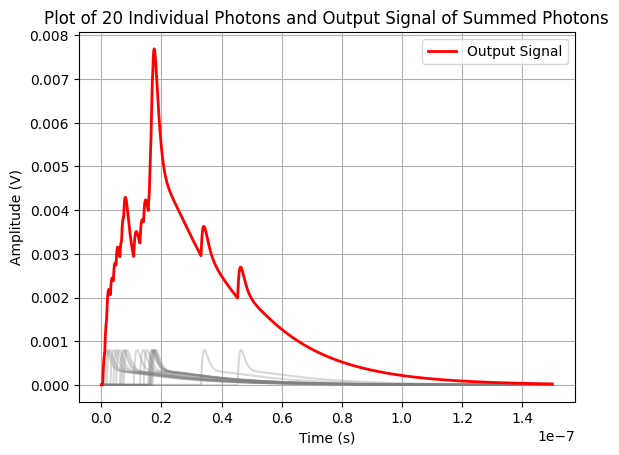

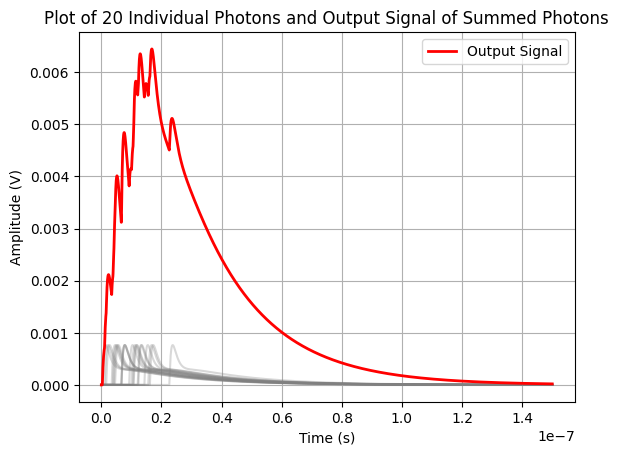

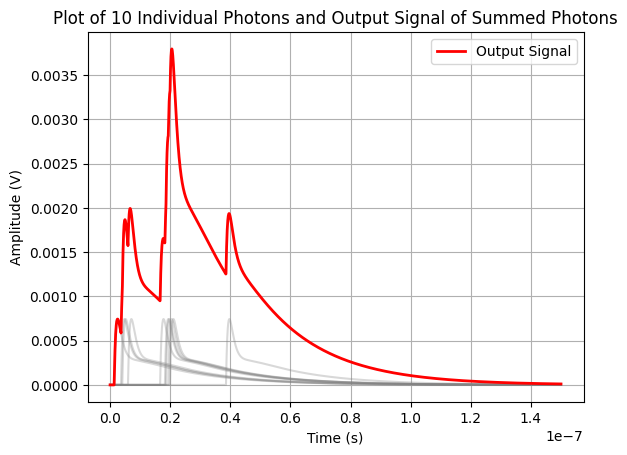

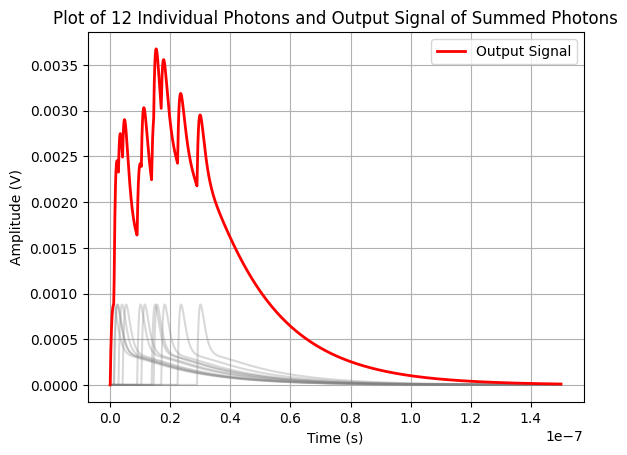

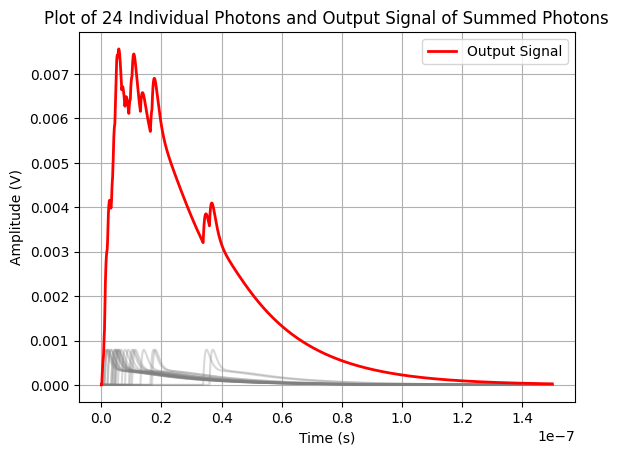

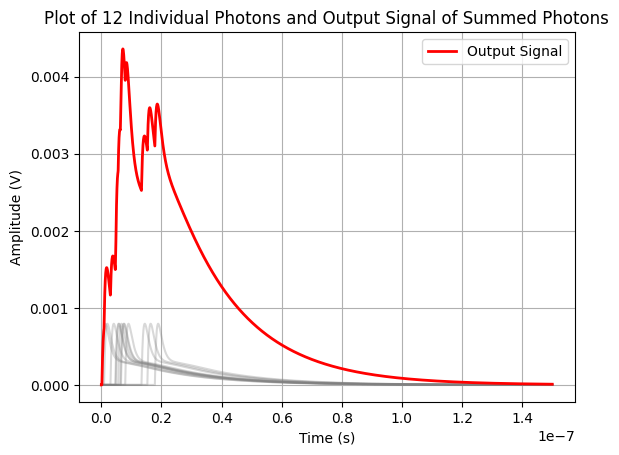

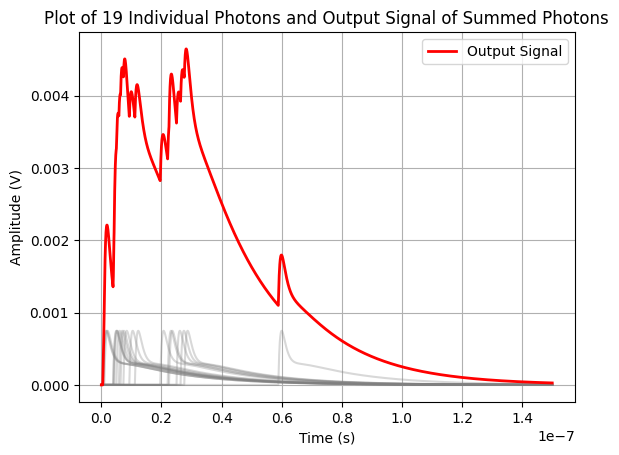

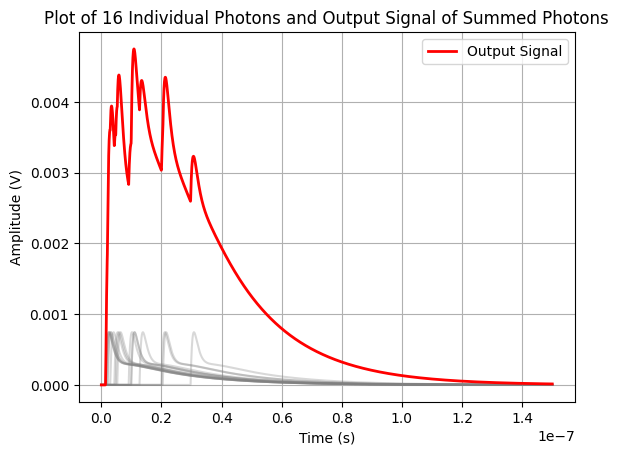

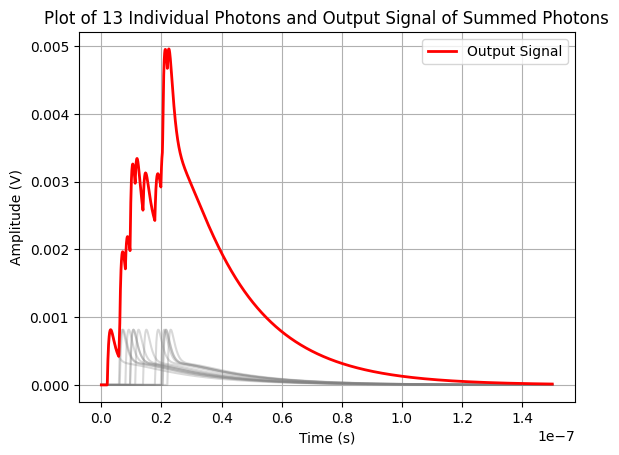

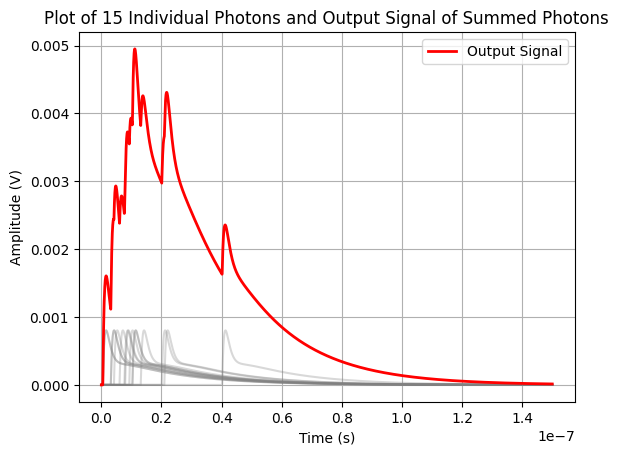

In [7]:
# Generate and export data for different numbers of photons
for index, n in enumerate(poisson_samples):
    simulate_photon_data_real_muon(n, index)

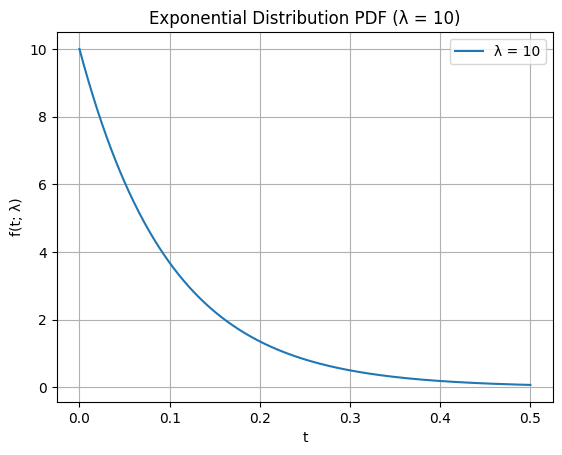

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rate parameter
lambda_param = 10
# Generate a range of t values
t_values = np.linspace(0, 0.5, 1000)
# Calculate the pdf
pdf_values = lambda_param * np.exp(-lambda_param * t_values)

# Plot the pdf
plt.plot(t_values, pdf_values, label=f'λ = {lambda_param}')
plt.xlabel('t')
plt.ylabel('f(t; λ)')
plt.title('Exponential Distribution PDF (λ = 10)')
plt.legend()
plt.grid(True)
plt.show()
